# 테스트를 위한 주피터 노트북

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

from data import generate_linear_sem, generate_linear_sem_correlated, generate_random_dag

True


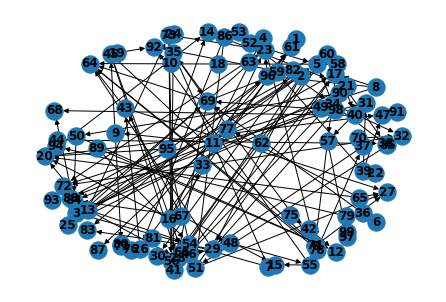

In [2]:
# Generate random DAG and plot

G = generate_random_dag(d=100, degree=3, seed=1 )

print(nx.is_directed_acyclic_graph(G))

nx.draw(G, with_labels=True, font_weight='bold')

In [3]:
X, cov = generate_linear_sem_correlated(G, n=1000, prop=0.5, seed=200)

Exception: Maximum number of iterations exceeded. Failed to generate a positive semidefinite covariance matrix.

<AxesSubplot: >

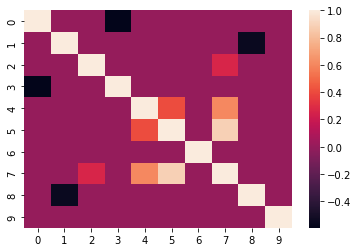

In [ ]:
import seaborn as sns

sns.heatmap(cov)

In [ ]:
np.linalg.eigvals(cov)

array([1.59467855, 0.40532145, 2.30606834, 0.04338611, 0.62688935,
       1.0236562 , 1.        , 1.55328144, 0.44671856, 1.        ])